In [24]:
import cv2
import os
data_path='test'
categories=os.listdir(data_path)
labels=[i for i in range (len(categories))]
label_dict=dict(zip(categories,labels))
print(label_dict)
print(categories)
print(labels)

{'cloudy': 0, 'sunny': 1}
['cloudy', 'sunny']
[0, 1]


In [25]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])

        except Exception as e:
           print('Exception: ',e)
       

In [26]:
import numpy as np

data=np.array(data)/255.0         # normalizing


data=np.reshape(data,(data.shape[0],img_size,img_size,1))
print(data.shape)

target=np.array(target)

from tensorflow.keras.utils import to_categorical
# from keras.utils import np_utils

new_target=to_categorical(target)
print(new_target)

(253, 100, 100, 1)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]


In [27]:
new_target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [28]:
np.save('data',data)
np.save('target',new_target)

In [29]:
import numpy as np
data= np.load('data.npy')
target=np.load('target.npy')

In [30]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [31]:
model = Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# the first cnn layer followed by relu and maxpooling layers


model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# the second cnn layer followed by relu and maxpooling layers
          
          
model.add(Flatten())
model.add(Dropout(0.5))
# flatten layer to stack the output convolutions from second convolution layer

model.add(Dense(50,activation='relu'))
# dense layer of 50 neurons

model.add(Dense(2,activation='softmax'))
# the final layer with two outputs and two categories


In [32]:

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [36]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras',monitor='val_loss',verbose=1,save_best_only=True,mode='auto')

history = model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.6035 - loss: 0.7276
Epoch 1: val_loss improved from inf to 0.61386, saving model to model-001.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 607ms/step - accuracy: 0.6001 - loss: 0.7270 - val_accuracy: 0.6957 - val_loss: 0.6139
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.6166 - loss: 0.6566
Epoch 2: val_loss did not improve from 0.61386
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 466ms/step - accuracy: 0.6138 - loss: 0.6571 - val_accuracy: 0.7391 - val_loss: 0.6592
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.7154 - loss: 0.6535
Epoch 3: val_loss improved from 0.61386 to 0.58195, saving model to model-003.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 510ms/step - accuracy: 0.7095 - loss: 0.6530 - val_accuracy: 0.7391 - val_loss: 0.5819
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.7462 - loss: 0.5608
Epoch 4: val_loss improved from 0.58195 to 0.53337, saving model to model-004.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 

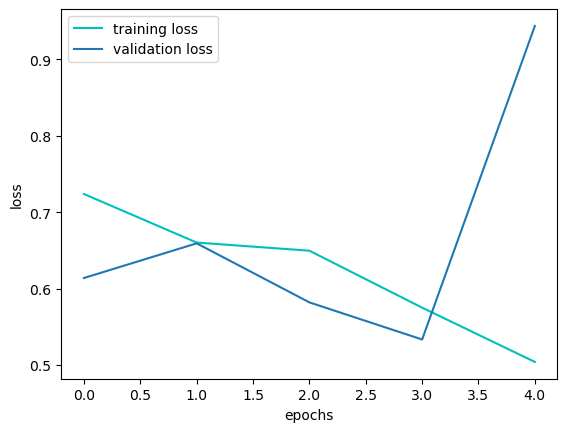

In [38]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'c',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

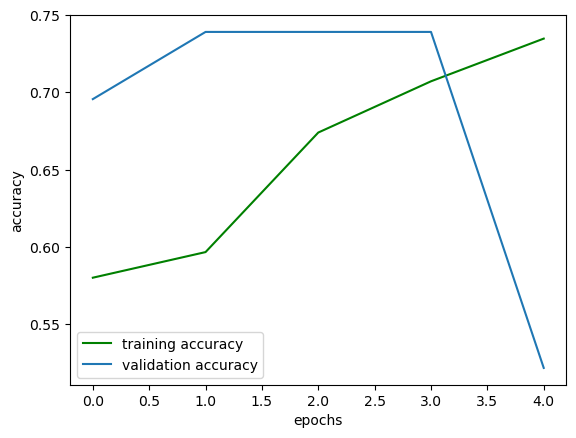

In [39]:
plt.plot(history.history['accuracy'],'g',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [44]:
model.save('weatherdetector.keras')

In [45]:
model=load_model('weatherdetector.keras')
model.summery()

C:\LOGS\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


AttributeError: 'Sequential' object has no attribute 'summery'